In [1]:
pip install spotipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pyvis

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import random
import altair as alt
import requests
import inspect
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import networkx as nx
import networkx.algorithms.community as nx_comm
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pyvis
from pyvis import network as net
from itertools import combinations
from community import community_louvain
from copy import deepcopy

In [4]:
# storing the credentials:
CLIENT_ID = "116bae2a86fd4737862816c5f45d4c36"
CLIENT_SECRET = "4f4a732d83d04cfa94acc26d2b77169f"
my_username = "sx47r9lq4dwrjx1r0ct9f9m09"

# instantiating the client
# source: Max Hilsdorf (https://towardsdatascience.com/how-to-create-large-music-datasets-using-spotipy-40e7242cc6a6)
client_credentials_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [5]:
playlist_dict = {
 "T40_Phung" : ('313pk3sai2bekdmtoefrbjmbv5ey', '1NppEwvZhkjeG3ZTYoOwVM'),
 "T40_Andric" : ('316b7eir5onpduebous2uyrqwxue', '2hfOGugGPsjfPTYKlZojom'),
 "T40_Zach" : ('7vwjo4k6w78rv4sz0z1vm41ij', '6QWlhkFUKDxhW91gfMisNl'),
 "T40_Joseph" : ('gre8t3583jofds1lvx1jvu170', '1d4mKuQzM62pmSqrQKU9EX'),
 "T40_Keith" : ('31zhcjb3h2e5miwmhyzeuj4cibmq', '07UNN5sIx1dYmAOmLPri3B'),
 "T40_RyanT" : ('rtrotter5', '3cfp7fWCHVXPl6JiBnmkLQ'),
 "T40_Suyash" : ('suyashdasgupta', '5feo72Xw1Fp99cj1t0e0ud'),
 "T40_Yikang" : ('g495g22jg4nfsbt31gxyiao1s', '7E5YHVj7yA5SVthGIAJ67g'),
 "T40_Ben" : ('mastermenk0', '5NuMif6wvlJeJv4dMuX5eh'),
 "T40_Xavier" : ('18xavier', '5QxWG2oKSylpTg9qS5rPRr'),
 "T40_RyanK" : ('pootsnoffle', '4xV24s6m1s6mPrilnsBqBa'),
 "T40_Susanna" : ('susiepieper42', '1kaDWd90UWUByF4Tu2UPVx'),
 "T40_Jishi" : ('31hwpxwmzz22hd46eqoagqznyfty', '3DmSmomqxsSehMhccpPbWP'),
 "T40_Elizabeth" : ('16g816mbn0732u7i2cvdwfwqyv ', '3Nd7XuKMH3RjQ6nF7n2kcv'),
 "T40_Edgar" : ('222ujvip6mzvs5t5dlhv554dy', '5LVjFO57XKpRNV5vzzDmP5'),
 "T40_Nicholas" : ('lqo6rtvo820c0ergub92yuurs', '4AITV0hEKFEjLcy5dJBrtC'),
 "T40_Jordan" : ('12144758701', '0QZa8PuiIKpSRDXFcbc2y2'),
 "T40_Jacob" : ('4uxd1wpjsxqvlpni1ixj09ipn','5YS9zh4bCOpJqhenIJfFyw')
 }

In [6]:
def analyze_playlist(creator, playlist_id):
    # source: Max Hilsdorf (https://towardsdatascience.com/how-to-create-large-music-datasets-using-spotipy-40e7242cc6a6)

    # Create empty dataframe
    playlist_features_list = ["artist", "album", "track_name", "track_id", 
                             "danceability", "energy", "key", "loudness", "mode", "speechiness",
                             "instrumentalness", "liveness", "valence", "tempo", "duration_ms", "time_signature"
                              ]
    playlist_df = pd.DataFrame(columns = playlist_features_list)
    
    # Create empty dict
    playlist_features = {}
    # We also want a dictionary to be populated with the popularity of each song
    popularity = {}
    
    # Loop through every track in the playlist, extract features and append the features to the playlist df
    
    # These two print statements were used in debugging when one of the user's playlists was not being recognized by the spotify API
    # The URL was the wrong one but I 
    #print(creator)
    #print(playlist_id)
    
    
    playlist = sp.user_playlist_tracks(creator, playlist_id)["items"]
    for track in playlist:
        # Get metadata
        # Create a
        popularity["popularity"] = track["track"]["popularity"]
        playlist_features["artist"] = track["track"]["album"]["artists"][0]["name"]
        playlist_features["album"] = track["track"]["album"]["name"]
        playlist_features["track_name"] = track["track"]["name"]
        playlist_features["track_id"] = track["track"]["id"]
        
        # Get audio features
        audio_features = sp.audio_features(playlist_features["track_id"])[0]
        for feature in playlist_features_list[4:]:
            playlist_features[feature] = audio_features[feature]
        
        # Concat the dfs
        track_df = pd.DataFrame(playlist_features, index = [0])
        popularity_df = pd.DataFrame(popularity, index = [0])
        track_df = pd.concat([track_df, popularity_df], axis = 1)
        playlist_df = pd.concat([playlist_df, track_df], ignore_index = True)
    return playlist_df

In [7]:
def analyze_playlist_dict(playlist_dict):
    # source: Max Hilsdorf (https://towardsdatascience.com/how-to-create-large-music-datasets-using-spotipy-40e7242cc6a6)

    # Loop through every playlist in the dict and analyze it
    for i, (key, val) in enumerate(playlist_dict.items()):
        playlist_df = analyze_playlist(*val)
        # Add a playlist column so that we can see which playlist a track belongs too
        playlist_df["playlist"] = key
        # Create or concat df
        if i == 0:
            playlist_dict_df = playlist_df
        else:
            playlist_dict_df = pd.concat([playlist_dict_df, playlist_df], ignore_index = False)
            
    return playlist_dict_df

In [8]:
multiple_playlist_df = analyze_playlist_dict(playlist_dict)

In [22]:
multiple_playlist_df

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity,playlist
0,Frank Sinatra,Strangers In The Night (Expanded Edition),Strangers In The Night,74VR3AkGPhbYXnxcOYa16x,0.259,0.4730,5,-8.275,1,0.0295,0,0.2010,0.539,90.348,157867,4,71.0,T40_Phung
1,The Temptations,The Temptations Sing Smokey,My Girl,745H5CctFr12Mo7cqa1BMH,0.572,0.4180,0,-10.738,1,0.0349,0,0.0961,0.694,104.566,165000,4,80.0,T40_Phung
2,Aretha Franklin,Respect - The Very Best of,I Say a Little Prayer,0FD8KMG4pHp0O9clTpChjp,0.590,0.3550,9,-14.051,1,0.0352,0,0.0585,0.499,133.030,216773,4,59.0,T40_Phung
3,Ella Fitzgerald,Ella And Basie,Dream A Little Dream Of Me,7sO8fLoq7H3er7C24UtLiF,0.283,0.0738,7,-23.595,1,0.0763,0,0.1050,0.223,72.034,246160,4,48.0,T40_Phung
4,Janis Joplin,I Got Dem Ol' Kozmic Blues Again Mama!,Maybe,0xGSeBsG4V8Scc5YqpZQ66,0.400,0.3500,8,-11.401,1,0.0345,0.0397,0.1030,0.328,83.389,219133,4,59.0,T40_Phung
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,The Who,Who's Next (Deluxe Edition),Behind Blue Eyes,0cKk8BKEi7zXbdrYdyqBP5,0.394,0.6220,4,-8.258,0,0.0336,0.000044,0.0892,0.342,126.844,221427,4,72.0,T40_Jacob
6,Jimmy Cliff,"Wonderful World, Beautiful People",Many Rivers To Cross,1dZxI6OuzwJ283y3gOU1Kq,0.399,0.2120,5,-16.030,1,0.0747,0.000434,0.1160,0.149,137.760,164067,4,51.0,T40_Jacob
7,Ben E. King,Stand By Me,Stand By Me,2KQM3kDM0zMBC9iynePBbS,0.653,0.3340,9,-6.955,1,0.0313,0.000035,0.1230,0.665,119.460,174253,4,59.0,T40_Jacob
8,Wilson Pickett,Hey Jude,Hey Jude,1MMp1H2Kib2BCDtdL5nL63,0.561,0.3850,6,-15.330,1,0.0323,0.000496,0.1710,0.664,81.599,247733,4,54.0,T40_Jacob


In [23]:
alt.Chart(multiple_playlist_df).mark_bar().encode(
    #x="track_name",
    alt.X('track_name', axis=alt.Axis(labelAngle=-45)),
    y='count()'
).properties(title = "Total Count of How Many People Put Each Song On Their Playlist")

alt.Chart(...)

In [13]:
alt.Chart(multiple_playlist_df).mark_bar().encode(
    alt.X("popularity", bin=True),
    y='count()',
).properties(title = "Frequency of Popular Songs in The Entire Dataset According to Spotify's Metrics")

alt.Chart(...)

In [14]:
alt.Chart(multiple_playlist_df).mark_point().encode(
    alt.X('track_name', axis=alt.Axis(labelAngle=-45)),
    y = "popularity"
).properties(title = "Popularity of Each Song According to Spotify's Metrics")

alt.Chart(...)

In [19]:
alt.Chart(multiple_playlist_df).mark_point().encode(
    alt.X('track_name', axis=alt.Axis(labelAngle=-45)),
    y = "popularity",
    color = "count()"
).properties(title = "Popularity Overlay According to Both Class and Spotify Metrics")

alt.Chart(...)

In [25]:
G=nx.from_pandas_edgelist(multiple_playlist_df, "playlist", "popularity")
G

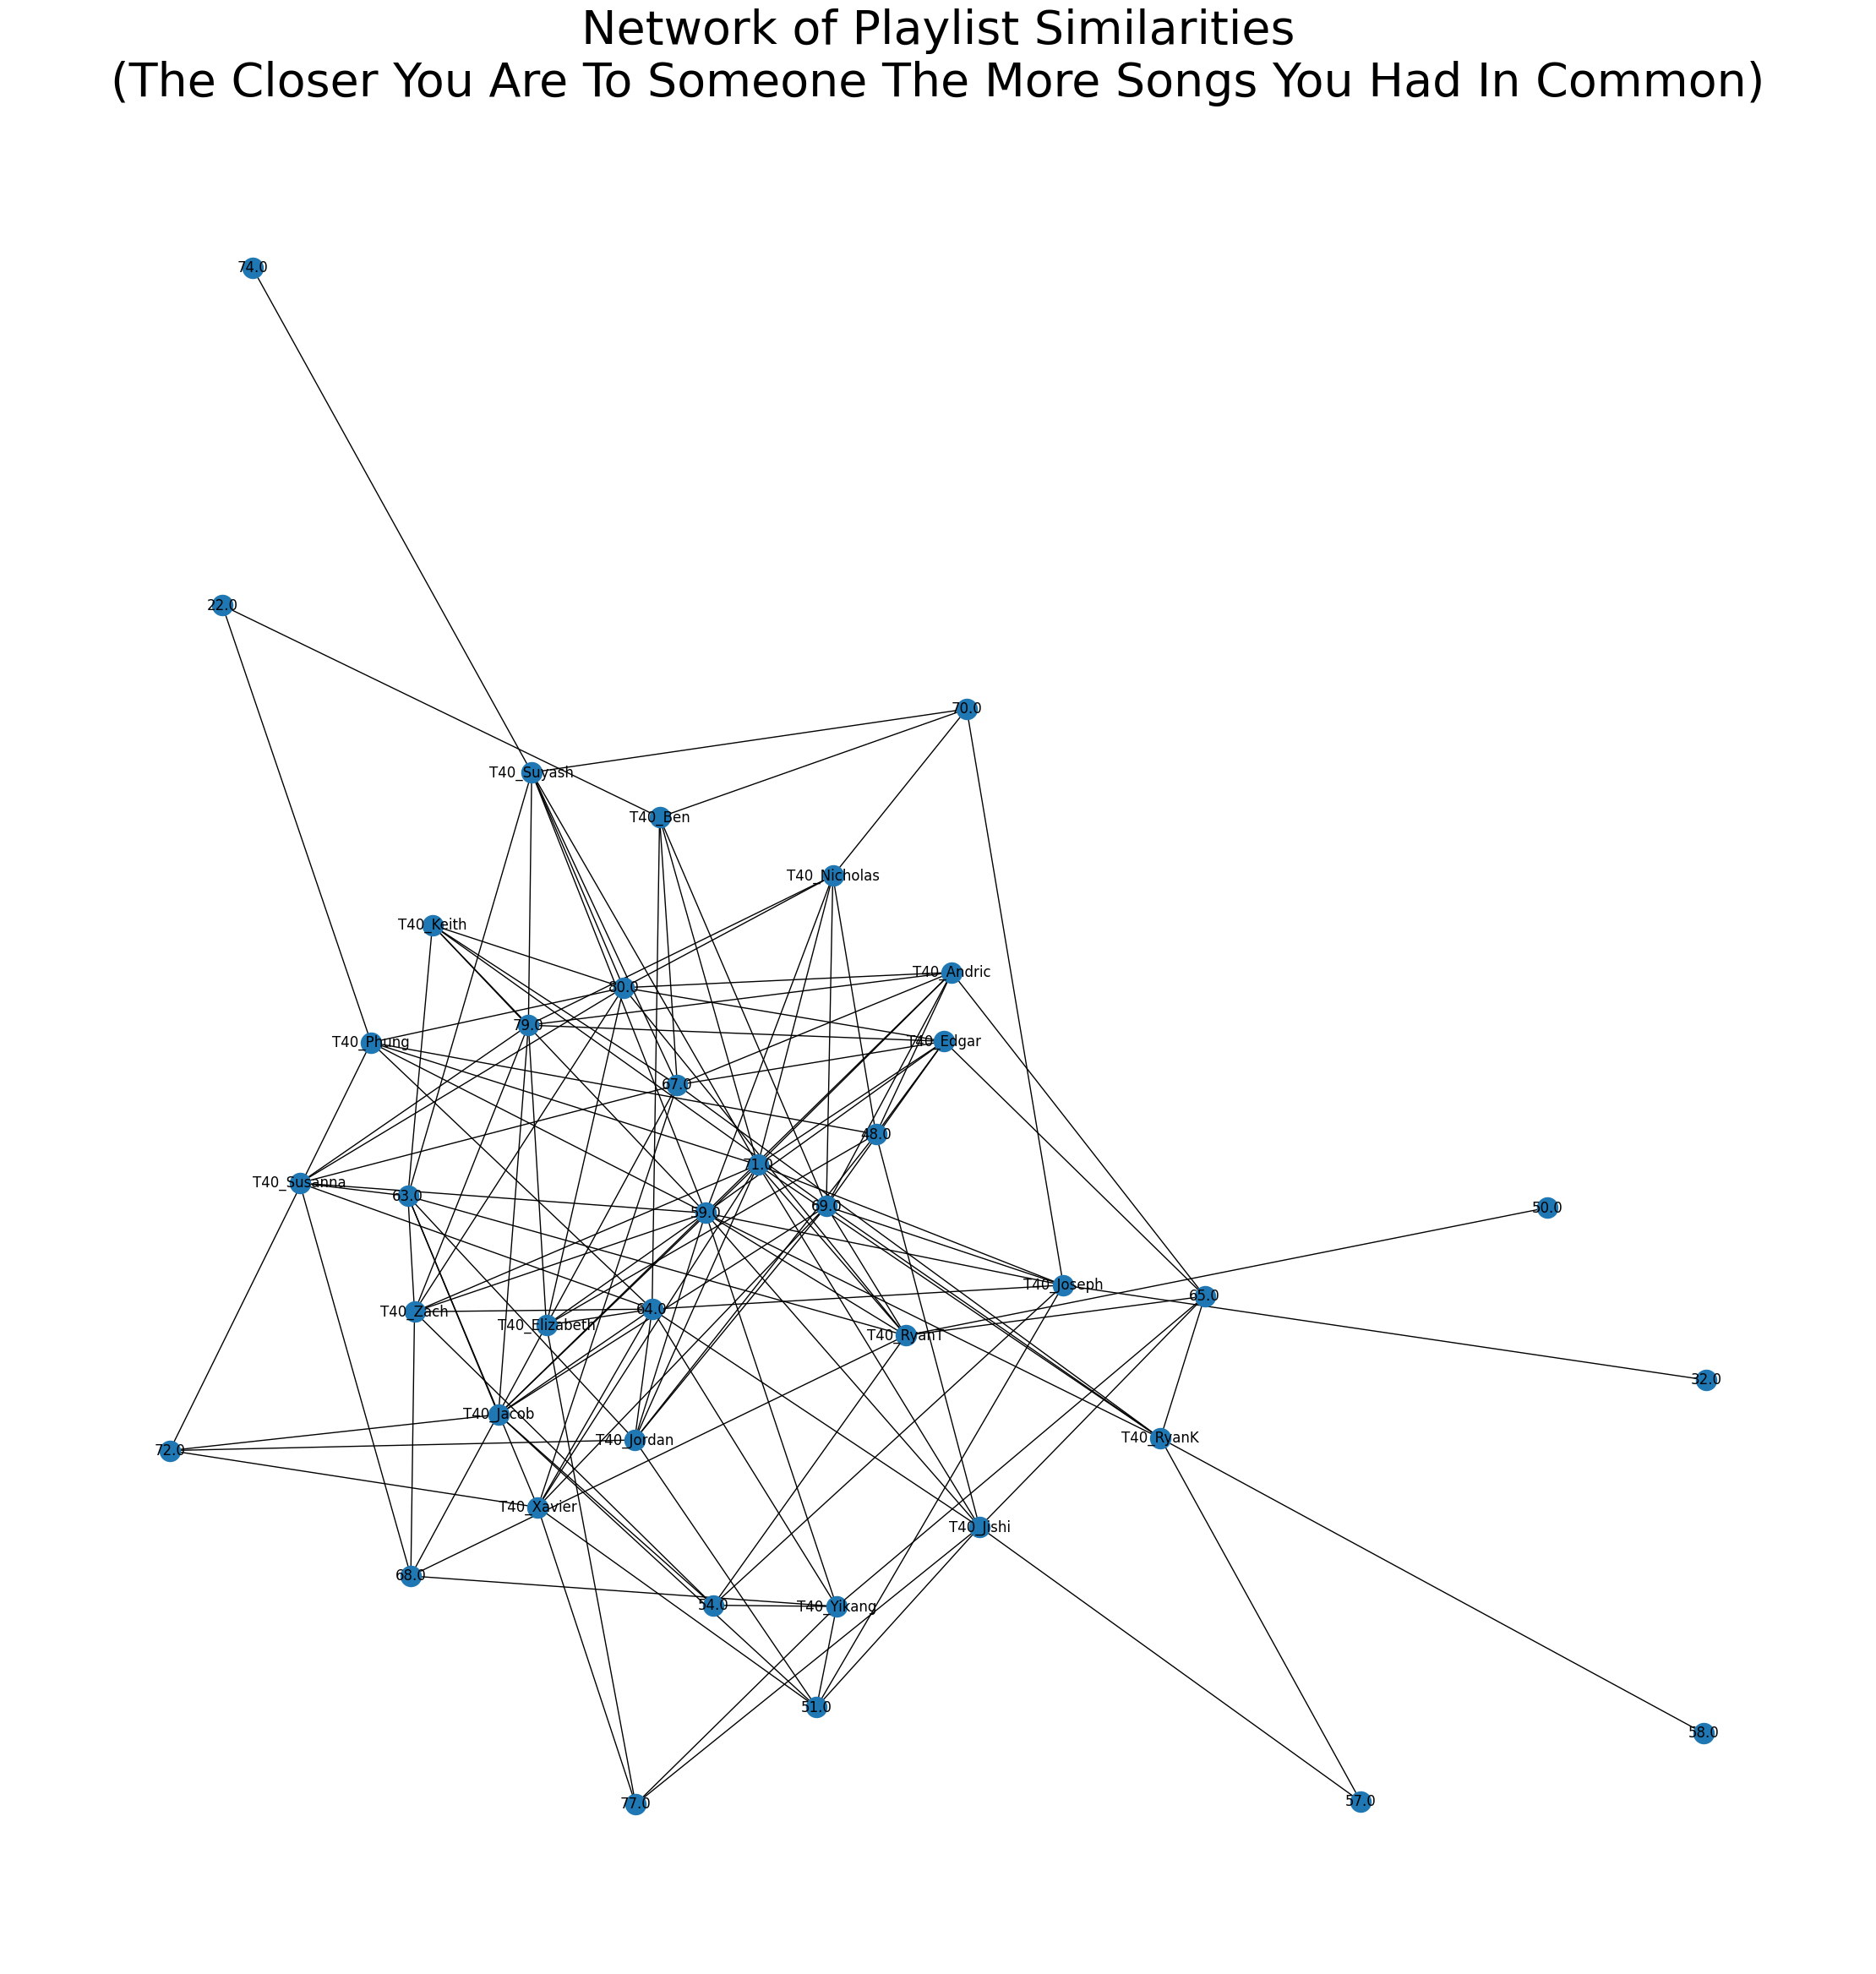

In [26]:
plt.figure(3,figsize=(22,22)) 
nx.draw(G, with_labels = True)
plt.title(label = "Network of Playlist Similarities\n(The Closer You Are To Someone The More Songs You Had In Common)",
          fontsize = 40)
plt.show()



In [27]:
partition = community_louvain.best_partition(G)
partition

{'T40_Phung': 2,
 71.0: 0,
 80.0: 1,
 59.0: 1,
 48.0: 2,
 72.0: 2,
 64.0: 2,
 22.0: 0,
 'T40_Andric': 1,
 69.0: 0,
 67.0: 1,
 65.0: 1,
 79.0: 1,
 'T40_Zach': 3,
 54.0: 3,
 68.0: 3,
 63.0: 3,
 'T40_Joseph': 2,
 70.0: 0,
 51.0: 2,
 32.0: 2,
 'T40_Keith': 1,
 'T40_RyanT': 3,
 50.0: 3,
 'T40_Suyash': 0,
 74.0: 0,
 'T40_Yikang': 3,
 77.0: 2,
 'T40_Ben': 0,
 'T40_Xavier': 2,
 'T40_RyanK': 0,
 58.0: 0,
 57.0: 0,
 'T40_Susanna': 1,
 'T40_Jishi': 2,
 'T40_Elizabeth': 1,
 'T40_Edgar': 1,
 'T40_Nicholas': 0,
 'T40_Jordan': 2,
 'T40_Jacob': 3}

In [17]:
#plt.figure(3,figsize=(12,12)) 
#pos = nx.spring_layout(G)
# color the nodes according to their partition
#cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
#nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=40,
                       #cmap=cmap, node_color=list(partition.values()))
#nx.draw_networkx_edges(G, pos, alpha=0.5)
#plt.title("Network of Playlist Similarities")
#plt.show()
#Don't really need this network (I believe it's the same as the one above)

In [18]:
alt.Chart(multiple_playlist_df).mark_boxplot(size=35, extent=0.5).encode(
    alt.X('playlist:O', axis=alt.Axis(labelAngle=-45)),
    y=alt.Y("popularity:Q",scale=alt.Scale(zero=False)),
    color = alt.Color('playlist')
).properties(width = 800, title = "Box Plots of Each Playlist's Popularity According To Spotify's Metrics")

alt.Chart(...)

In [19]:
#We now have to normalize the popularity data so that we can use it in the radar plot
column = "popularity"
multiple_playlist_df[column] = (multiple_playlist_df[column] - multiple_playlist_df[column].min()) / (multiple_playlist_df[column].max()-multiple_playlist_df[column].min())

In [20]:
multiple_playlist_df

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity,playlist
0,Frank Sinatra,Strangers In The Night (Expanded Edition),Strangers In The Night,74VR3AkGPhbYXnxcOYa16x,0.259,0.4730,5,-8.275,1,0.0295,0,0.2010,0.539,90.348,157867,4,0.830508,T40_Phung
1,The Temptations,The Temptations Sing Smokey,My Girl,745H5CctFr12Mo7cqa1BMH,0.572,0.4180,0,-10.738,1,0.0349,0,0.0961,0.694,104.566,165000,4,1.000000,T40_Phung
2,Aretha Franklin,Respect - The Very Best of,I Say a Little Prayer,0FD8KMG4pHp0O9clTpChjp,0.590,0.3550,9,-14.051,1,0.0352,0,0.0585,0.499,133.030,216773,4,0.644068,T40_Phung
3,Ella Fitzgerald,Ella And Basie,Dream A Little Dream Of Me,7sO8fLoq7H3er7C24UtLiF,0.283,0.0738,7,-23.595,1,0.0763,0,0.1050,0.223,72.034,246160,4,0.457627,T40_Phung
4,Janis Joplin,I Got Dem Ol' Kozmic Blues Again Mama!,Maybe,0xGSeBsG4V8Scc5YqpZQ66,0.400,0.3500,8,-11.401,1,0.0345,0.0397,0.1030,0.328,83.389,219133,4,0.627119,T40_Phung
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,The Who,Who's Next (Deluxe Edition),Behind Blue Eyes,0cKk8BKEi7zXbdrYdyqBP5,0.394,0.6220,4,-8.258,0,0.0336,0.000044,0.0892,0.342,126.844,221427,4,0.864407,T40_Jacob
6,Jimmy Cliff,"Wonderful World, Beautiful People",Many Rivers To Cross,1dZxI6OuzwJ283y3gOU1Kq,0.399,0.2120,5,-16.030,1,0.0747,0.000434,0.1160,0.149,137.760,164067,4,0.491525,T40_Jacob
7,Ben E. King,Stand By Me,Stand By Me,2KQM3kDM0zMBC9iynePBbS,0.653,0.3340,9,-6.955,1,0.0313,0.000035,0.1230,0.665,119.460,174253,4,0.627119,T40_Jacob
8,Wilson Pickett,Hey Jude,Hey Jude,1MMp1H2Kib2BCDtdL5nL63,0.561,0.3850,6,-15.330,1,0.0323,0.000496,0.1710,0.664,81.599,247733,4,0.559322,T40_Jacob


In [35]:
import plotly.graph_objects as go
import plotly.offline as pyo

length = len(multiple_playlist_df)
input_data = multiple_playlist_df.sample(length).copy()

feature_columns = ["danceability", "energy", "speechiness", "liveness", "instrumentalness", "liveness","valence", "popularity", "danceability"]

def createRadarElement(row, feature_cols):
    return go.Scatterpolar(
        r = row[feature_cols].values.tolist(), 
        theta = feature_cols, 
        mode = 'lines', 
        name = row['track_name'])

data = list(input_data.apply(createRadarElement, axis=1, args=(feature_columns, )))  

fig = go.Figure(data, layout=go.Layout(
        title=go.layout.Title(text="Radar Plot For Each Song In Dataframe")
    ))
fig.write_image("Radar Plot For Each Song In Dataframe.png", width = 1500, height = 750)


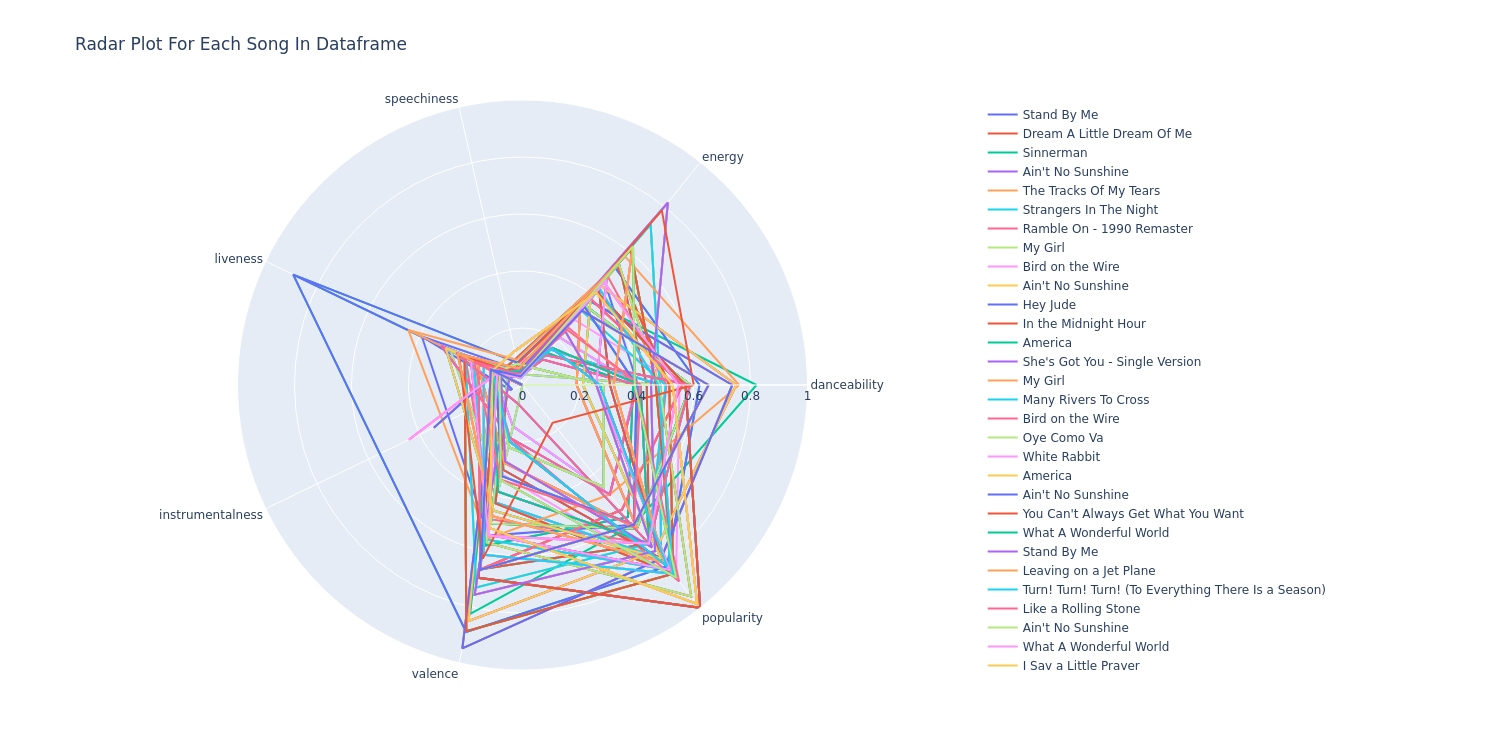

In [36]:
from IPython.display import Image
Image(filename='Radar Plot For Each Song In Dataframe.png') 

In [31]:
#We want to create a subset of the 5 most popular songs according to how many people put it on their playlist
top_songs_class = ['I Say a Little Prayer',
                   'My Girl',
                   'What A Wonderful World',
                   "Ain't No Sunshine",
                  'Stand By Me']

most_popular_in_class = multiple_playlist_df.loc[multiple_playlist_df['track_name'].isin(top_songs_class)].drop_duplicates(subset = "track_name")
most_popular_in_class

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity,playlist
1,The Temptations,The Temptations Sing Smokey,My Girl,745H5CctFr12Mo7cqa1BMH,0.572,0.418,0,-10.738,1,0.0349,0,0.0961,0.694,104.566,165000,4,1.000000,T40_Phung
2,Aretha Franklin,Respect - The Very Best of,I Say a Little Prayer,0FD8KMG4pHp0O9clTpChjp,0.590,0.355,9,-14.051,1,0.0352,0,0.0585,0.499,133.030,216773,4,0.644068,T40_Phung
1,Ben E. King,Stand By Me,Stand By Me,2KQM3kDM0zMBC9iynePBbS,0.653,0.334,9,-6.955,1,0.0313,0.000035,0.1230,0.665,119.460,174253,4,0.627119,T40_Andric
2,Louis Armstrong,What A Wonderful World,What A Wonderful World,29U7stRjqHU6rMiS8BfaI9,0.271,0.165,5,-20.652,1,0.0351,0.000002,0.1180,0.203,77.082,139227,4,0.813559,T40_Andric
8,Bill Withers,Just As I Am,Ain't No Sunshine,1k1Bqnv2R0uJXQN4u6LKYt,0.527,0.415,4,-11.451,0,0.1220,0.000017,0.1170,0.515,78.169,125093,4,0.983051,T40_Andric


In [38]:
import plotly.graph_objects as go
import plotly.offline as pyo

length = len(most_popular_in_class)
input_data = most_popular_in_class.sample(length).copy()

feature_columns = ["danceability", "energy", "speechiness", "liveness", "instrumentalness", "liveness","valence", "popularity", "danceability"]

def createRadarElement(row, feature_cols):
    return go.Scatterpolar(
        r = row[feature_cols].values.tolist(), 
        theta = feature_cols, 
        mode = 'lines', 
        name = row['track_name'])

data = list(input_data.apply(createRadarElement, axis=1, args=(feature_columns, )))  

fig = go.Figure(data,     layout=go.Layout(
        title=go.layout.Title(text="Radar Plot For The Most Popular Songs According To Class")
    ))
fig.write_image("Radar Plot For The Most Popular Songs According To Class.png", width = 1500, height = 750)

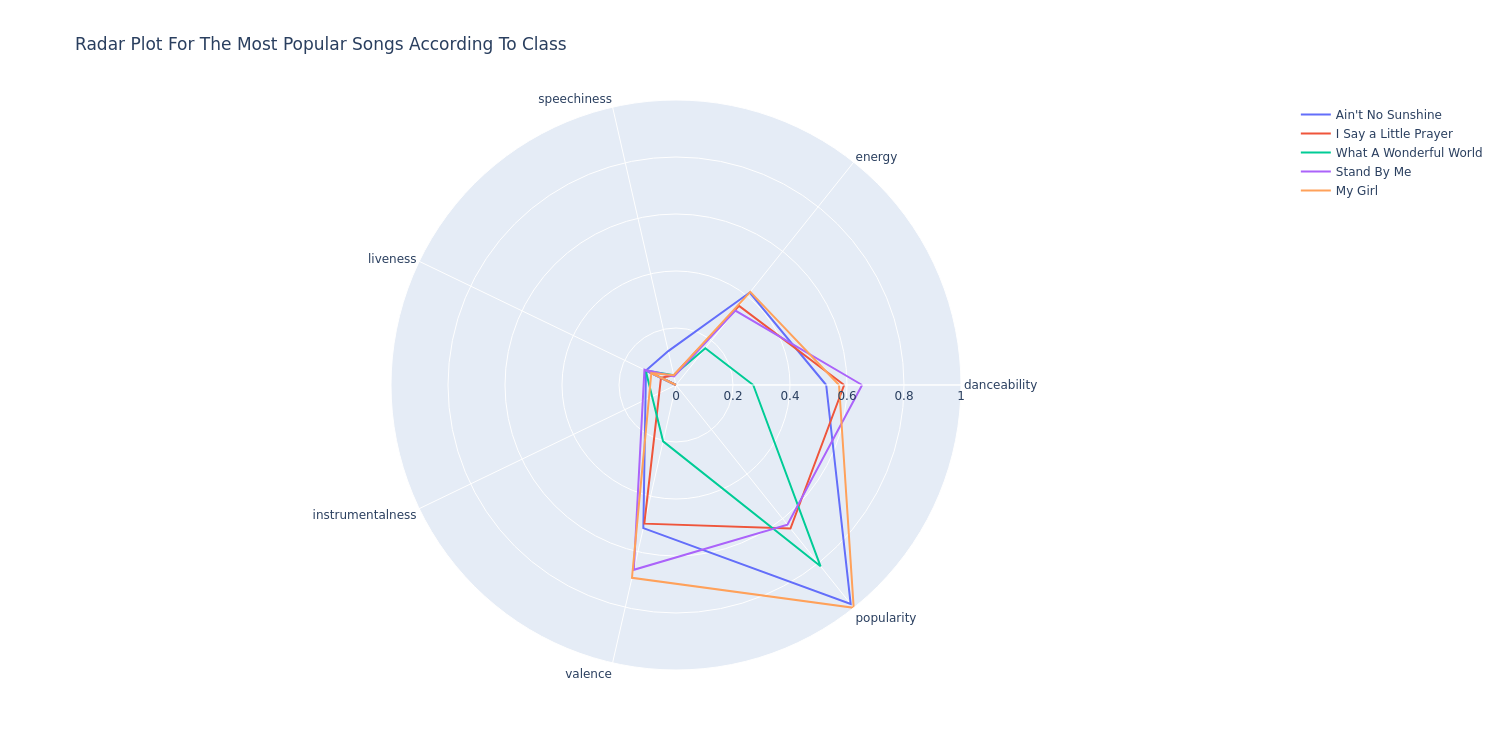

In [39]:
from IPython.display import Image
Image(filename="Radar Plot For The Most Popular Songs According To Class.png") 

In [24]:
#We want to create a subset of the top 5 most popular songs according to Spotify
top_songs_spotify = multiple_playlist_df.drop_duplicates(subset = "track_name").nlargest(5,"popularity")
top_songs_spotify

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity,playlist
1,The Temptations,The Temptations Sing Smokey,My Girl,745H5CctFr12Mo7cqa1BMH,0.572,0.418,0,-10.738,1,0.0349,0,0.0961,0.694,104.566,165000,4,1.000000,T40_Phung
8,Bill Withers,Just As I Am,Ain't No Sunshine,1k1Bqnv2R0uJXQN4u6LKYt,0.527,0.415,4,-11.451,0,0.1220,0.000017,0.1170,0.515,78.169,125093,4,0.983051,T40_Andric
5,Yusuf / Cat Stevens,Tea For The Tillerman (Remastered 2020),Wild World,7mjSHL2Eb0kAwiKbvNNyD9,0.480,0.542,0,-8.510,1,0.0348,0.000609,0.1130,0.567,152.853,200560,4,0.949153,T40_Yikang
5,The Who,Who's Next (Deluxe Edition),Behind Blue Eyes,0cKk8BKEi7zXbdrYdyqBP5,0.394,0.622,4,-8.258,0,0.0336,0.000044,0.0892,0.342,126.844,221427,4,0.864407,T40_Phung
5,Jefferson Airplane,Surrealistic Pillow,White Rabbit,4vpeKl0vMGdAXpZiQB2Dtd,0.551,0.293,2,-12.503,1,0.0272,0.000273,0.0864,0.322,106.798,150640,4,0.864407,T40_Jordan


In [40]:
import plotly.graph_objects as go
import plotly.offline as pyo

length = len(top_songs_spotify)
input_data = top_songs_spotify.sample(length).copy()

feature_columns = ["danceability", "energy", "speechiness", "liveness", "instrumentalness", "liveness","valence", "popularity", "danceability"]

def createRadarElement(row, feature_cols):
    return go.Scatterpolar(
        r = row[feature_cols].values.tolist(), 
        theta = feature_cols, 
        mode = 'lines', 
        name = row['track_name'])

data = list(input_data.apply(createRadarElement, axis=1, args=(feature_columns, )))  

fig = go.Figure(data,     layout=go.Layout(
        title=go.layout.Title(text="Radar Plot For The Most Popular Songs According To Spotify's Metrics")
    ))
fig.write_image("Radar Plot For The Most Popular Songs According To Spotify's Metrics.png", width = 1500, height = 750)

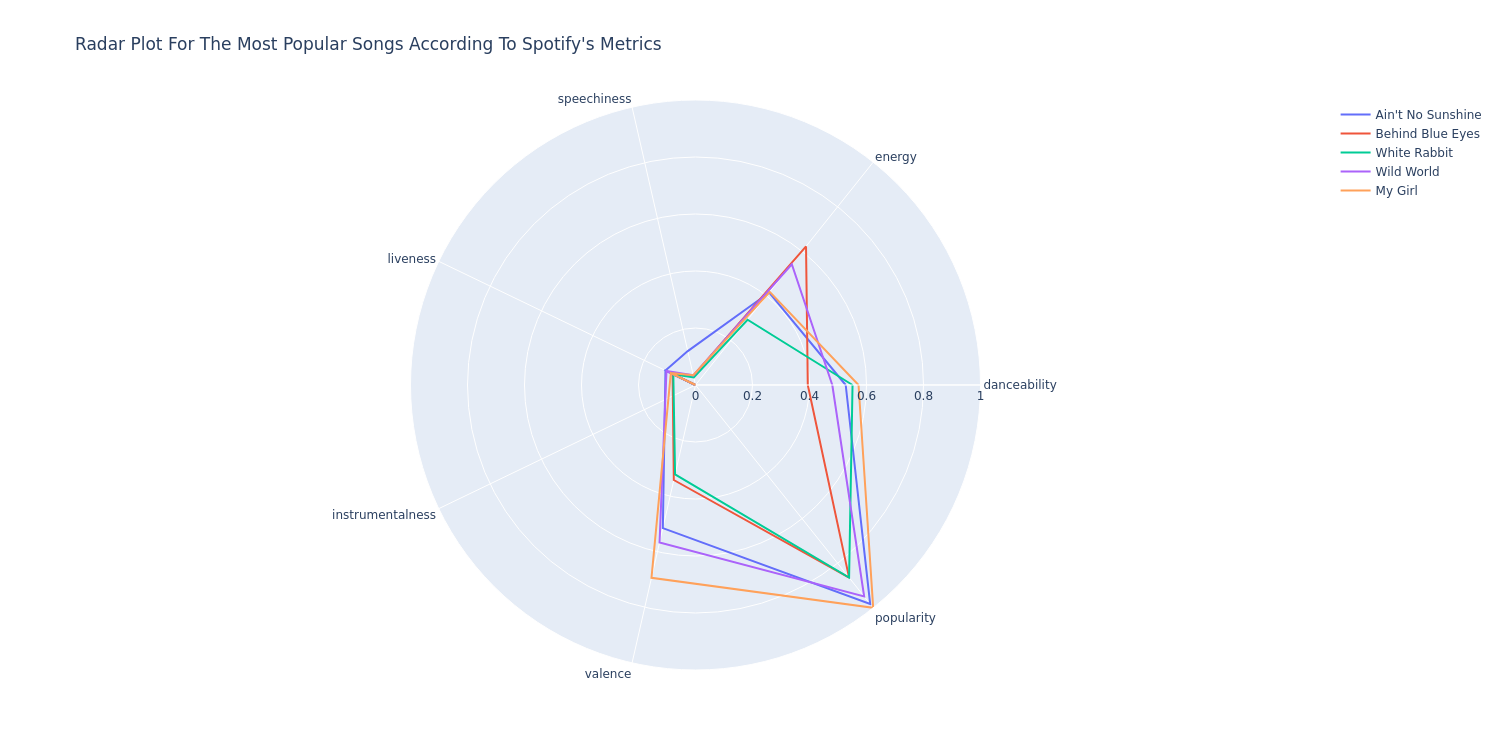

In [41]:
from IPython.display import Image
Image(filename="Radar Plot For The Most Popular Songs According To Spotify's Metrics.png") 